# REVOLUTIONIZING SKINCARE WITH AI POWERED RECOMMENDATIONS FOR MELANIN RICH SKIN

![2d248f5507752726ddc2198b39071e4e](https://github.com/user-attachments/assets/9c7a2247-b758-4aee-8bc7-50fa0bf76f2d)


**GROUP MEMBERS**
1. Esther Cheruiyot
2. Brian Githinji
3. Grace Gitau 
4. Maureen Imanene

## PROJECT SUMMARY

To come back to...

## Business Problem
Black women represent a significant demographic in the beauty and skincare industry, yet they face limited access to skincare products tailored to their specific needs, such as hyper- pigmentation, dryness, and sensitivity. Most available recommendation systems overlook the unique skin concerns of Black women, offering general suggestions rather than targeted solutions. This gap impacts consumer satisfaction, as Black women often struggle to find effective products for their melanin-rich skin. 

This project aims to develop a recommendation system using advanced AI techniques to cater specifically to Black women’s skincare needs. By integrating machine learning, content- based filtering, collaborative filtering, and sentiment analysis, the system will offer personalized skincare recommendations. Leveraging skin_tone (Author's skin tone (e.g. fair, tan, etc.) as a classification feature, we aim to distinguish and target products that align with melanin-rich skin concerns.

## Objectives
1. Develop a melanin-centered skincare recommendation system using deep learning, tailored for Black women’s unique skin needs. 2. Utilize content-based and collaborative filtering along with sentiment analysis to enhance recommendation accuracy. 
3. Deploy an accessible Streamlit interface for personalized, user-friendly skincare suggestions. 
4. Integrate Logistic Regression, SVD, and K-means clustering to improve recommendation precision.

## Stakeholders
1. *Users*: Black women seeking tailored skincare solutions. 
2. *Skincare Brands*: Companies interested in product insights for melanin-rich skin. 
3. *Healthcare Professionals*: Dermatologists who may use the system as a recommendation tool. 
4. *AI and Skincare Researchers*: Those exploring AI applications in skincare for under- represented groups.

## Data Understanding:
The dataset was collected via a Python scraper and contains:
- Product Information: Over 8,000 beauty products from the Sephora online store, including product and brand names, prices, ingredients, ratings, and various features. 
- User Reviews: Approximately 1 million reviews across over 2,000 products in the skincare category. These reviews include user appearances, skin types, and review ratings.

The key features include:
- Product Features: `product_id`, `product_name`, `brand_name`, `ingredients`, `rating`, `price_ksh`, `new`, `out_of_stock`, `highlights`. 
- Review Features: `author_id`, `rating`, `review_text`, `skin_type`, `skin_tone`, and
`helpfulness`.

### STEP 1: DATA LOADING

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # To visualize text data
import re
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, precision_score, recall_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix, roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

import pickle

In [2]:
# Load the product info and skincare products reviews from Excel files
products = pd.read_csv('data/product_info.xls', encoding = "ISO-8859-1")
reviews = pd.read_csv('data/skincare_products_reviews.xls', encoding = "ISO-8859-1", low_memory=False)

print('Products size:', products.shape)
print('Reviews size:', reviews.shape)

Products size: (8494, 27)
Reviews size: (49977, 19)


In [3]:
# Necessary columns for target analysis
product_columns = [
    'product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 
    'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 
    'ingredients', 'price_usd', 'new', 'out_of_stock', 'highlights', 'primary_category', 
    'secondary_category', 'tertiary_category', 'sephora_exclusive'
]

review_columns = [
    'product_id', 'author_id', 'rating', 'is_recommended', 'helpfulness', 
    'review_text', 'skin_tone', 'skin_type', 'eye_color', 'hair_color', 'submission_time'
]

# Filter columns in each dataset
products_filtered = products[product_columns]
reviews_filtered = reviews[review_columns]

# Merge filtered dataframes on 'product_id'
data = pd.merge(products_filtered, reviews_filtered, on='product_id', how='inner')

# Display merged data info and preview
data.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating_x,reviews,size,variation_type,variation_value,...,author_id,rating_y,is_recommended,helpfulness,review_text,skin_tone,skin_type,eye_color,hair_color,submission_time
0,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,6921691467,5,1.0,1.000000,This product is amazing. Makes my skin feel so...,NaN,dry,hazel,blonde,2023-01-02
1,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,40727014792,5,1.0,0.833333,I pair this with the algae niacinamide moistur...,NaN,combination,blue,blonde,2022-11-06
2,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,7186952566,5,1.0,0.625000,Definitely my favorite I use it for under eye ...,NaN,NaN,NaN,NaN,2022-10-05
3,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,2117812169,5,1.0,1.000000,I bought this with the toner as I was looking ...,light,combination,green,brown,2022-09-15
4,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,12538328524,5,1.0,0.888889,Been using for months now. I went in and asked...,fair,NaN,NaN,NaN,2022-06-02


### STEP 2: DATA PRE-PROCESSING

In [4]:
# Checking for duplicates
data.duplicated().sum()

0

In [5]:
# Handling missing values
missing = []
unique = []
types = []
variables = []
count = []

for item in data.columns:
    variables.append(item)
    missing.append(data[item].isnull().sum())
    unique.append(data[item].nunique())
    types.append(data[item].dtypes)
    count.append(len(data[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})
print("Data info : ")
output.sort_values("missing",ascending=False).reset_index(drop=True)

Data info : 


,variable,dtype,count,unique,missing
0,variation_desc,object,49977,5,49585
1,helpfulness,float64,49977,1209,13455
2,highlights,object,49977,750,11513
3,variation_value,object,49977,283,10338
4,variation_type,object,49977,5,9052
5,hair_color,object,49977,7,8851
6,size,object,49977,280,8615
7,skin_tone,object,49977,14,7201
8,tertiary_category,object,49977,29,6996
9,eye_color,object,49977,6,6260


In [6]:
# Define threshold for missing values (e.g., 50%)
threshold = 0.5

# Calculate the percentage of missing values for each column
output['missing_percentage'] = output['missing'] / output['count']

# List columns with missing values above the threshold
columns_to_drop = output[output['missing_percentage'] > threshold]['variable'].tolist()

# Drop these columns from the data
data.drop(columns=columns_to_drop, axis=1, inplace=True)
print("Dropped columns with over 50% missing values:", columns_to_drop)

Dropped columns with over 50% missing values: ['variation_desc']


In [7]:
# Drop rows with missing values
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16060 entries, 3 to 49969
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          16060 non-null  object 
 1   product_name        16060 non-null  object 
 2   brand_id            16060 non-null  int64  
 3   brand_name          16060 non-null  object 
 4   loves_count         16060 non-null  int64  
 5   rating_x            16060 non-null  float64
 6   reviews             16060 non-null  float64
 7   size                16060 non-null  object 
 8   variation_type      16060 non-null  object 
 9   variation_value     16060 non-null  object 
 10  ingredients         16060 non-null  object 
 11  price_usd           16060 non-null  float64
 12  new                 16060 non-null  int64  
 13  out_of_stock        16060 non-null  int64  
 14  highlights          16060 non-null  object 
 15  primary_category    16060 non-null  object 
 16  secondary

In [8]:
data.shape

(16060, 29)

In [9]:
# Basic Statistical Overview
data.describe()

,brand_id,loves_count,rating_x,reviews,price_usd,new,out_of_stock,sephora_exclusive,rating_y,is_recommended,helpfulness
count,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000,16060.000000
mean,5894.136426,9793.330635,4.203908,75.435679,61.749730,0.039228,0.055044,0.297073,4.140847,0.786800,0.773630
std,1377.326239,8030.100198,0.440261,36.497593,58.752432,0.194143,0.228072,0.456983,1.307110,0.409581,0.299565
min,1073.000000,0.000000,1.846200,1.000000,3.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5946.000000,3993.000000,3.963400,46.000000,28.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.666667
50%,6272.000000,7740.000000,4.255100,75.000000,43.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.900000
75%,6357.000000,12520.000000,4.538500,105.000000,73.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000
max,8017.000000,43971.000000,5.000000,139.000000,400.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


Creating a new 'skin_tone_category' column to classify skin tones as 'light' or 'dark'. By grouping skin tones into 'light' and 'dark,' we can focus our analysis and modeling efforts on characteristics most relevant to our target audience, ensuring more accurate and personalized recommendations for melanated skin types.

In [10]:
# Lists of skin tones categorized as 'light' or 'dark'
light_skin_tones = ['light', 'fair', 'lightMedium', 'fairLight', 'porcelain', 'olive']
dark_skin_tones = ['mediumTan', 'medium', 'tan', 'rich', 'deep', 'dark']

# Creating a new column 'skin_tone_category' with 'light' and 'dark' values
data['skin_tone_category'] = data['skin_tone'].apply(lambda x: 'non-melanated' if x in light_skin_tones else 'melanated' if x in dark_skin_tones else 'other')

# Convert 'submission_time' to datetime format
data['submission_time'] = pd.to_datetime(data['submission_time'], errors='coerce')

# Normalize Prices
data['price_ksh'] = (data['price_usd'] * 129.27)

**TEXT CLEANING STEPS:**
1.  Converting the text to lowercase to ensure uniformity.
2.  Removing square bracket enclosed content to eliminate unnecessary elements.
3.  Eliminating URLs (both http and www) to enhance readability.
4.  Removing HTML tags to strip away any formatting artifacts.
5.  Eliminating punctuation marks to focus solely on textual content.
6.  Removing newline characters to maintain consistency in formatting.
7.  Eliminating alphanumeric words to streamline the dataset.
8.  Tokenizing the text using spaces to facilitate further processing.
9.  Removing stop words to reduce noise in the dataset.
10.  Employing stemming to reduce words to their root form, aiding in simplification.
11.  Joining the cleaned words back into a cohesive string to prepare for subsequent analysis.
12.  Returning the cleaned text, now deemed suitable for further processing

In [11]:
# Text cleaning function [review_text]

# Initialize the stemmer
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Step 1
    text = re.sub(r'\[.*?\]', '', text)  # Step 2
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Step 3
    text = re.sub(r'<.*?>', '', text)  # Step 4
    text = re.sub(r'[^\w\s]', '', text)  # Step 5
    text = re.sub(r'\n', ' ', text)  # Step 6
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Step 7
    tokens = text.split()  # Step 8

    # Step 9: Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Step 10: Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Step 11: Join tokens
    return ' '.join(tokens)

# Apply the cleaning function to the review_text column
data['review_text'] = data['review_text'].apply(clean_text)

**Size:** Standardizing units and handling any variations or inconsistencies.

- Converting values to a consistent unit, milliliters.
- Extracting numerical values to handle as continuous data for modeling if needed.

**Ingredients:** Leaving ingredients raw preserves essential chemical terms for analysis. This enables targeted NLP methods, like TF-IDF, to identify key ingredients and supports ingredient-based recommendations. This approach maintains data integrity for future modeling without altering original content.

In [12]:
# Text cleaning function [Size]

# Standardize 'size' column
# Example: extract numerical part and units, e.g., '50 ml' to 50 and 'ml'
def clean_size(size):
    if pd.isna(size):
        return None
    size = size.lower()
    match = re.match(r'(\d+(\.\d+)?)\s?(ml|oz|g|grams|ounces)?', size)
    if match:
        value, _, unit = match.groups()
        # Convert to a consistent unit, e.g., convert oz to ml
        if unit in ['oz', 'ounces']:
            return float(value) * 29.5735  # Convert ounces to milliliters
        elif unit in ['g', 'grams']:
            return float(value)  # Keeping grams as is
        else:
            return float(value)  # If it's ml or unspecified, assume ml
    return None

data['size_ml'] = data['size'].apply(clean_size)
data.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating_x,reviews,size,variation_type,variation_value,...,helpfulness,review_text,skin_tone,skin_type,eye_color,hair_color,submission_time,skin_tone_category,price_ksh,size_ml
3,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,1.000000,bought toner look product azela acid help majo...,light,combination,green,brown,2022-09-15,non-melanated,7497.66,39.924225
5,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,0.833333,product recommend nonbeliev yet knew sephora m...,fair,combination,brown,blonde,2021-11-18,non-melanated,7497.66,39.924225
8,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,0.777778,first ever purchas algenist definit dont regre...,light,oily,brown,black,2021-07-30,non-melanated,7497.66,39.924225
9,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,1.000000,stress skin start burn seem help calm use mani...,light,dry,blue,brown,2021-05-17,non-melanated,7497.66,39.924225
10,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.464,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,1.000000,sampl sit drawer month gave tri deal extrem dr...,fair,combination,blue,blonde,2021-05-10,non-melanated,7497.66,39.924225


### STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

#### UNIVARIATE ANALYSIS

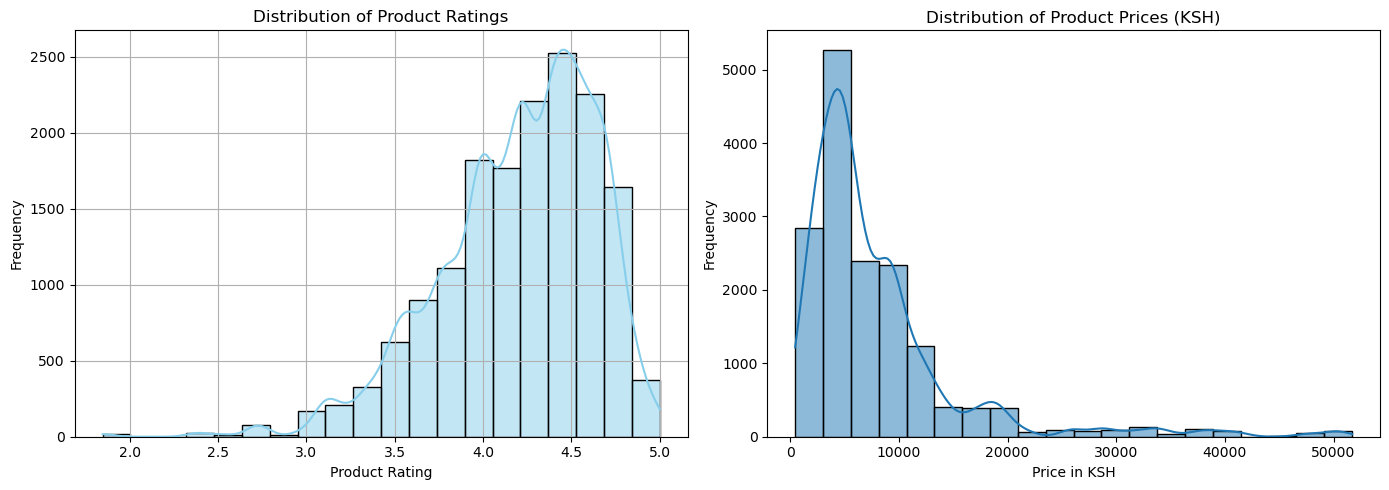

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Visualizing Distribution of Ratings
sns.histplot(data['rating_x'], bins=20, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Distribution of Product Ratings')
ax1.set_xlabel('Product Rating')
ax1.set_ylabel('Frequency')
ax1.grid()

# Price Distribution
sns.histplot(data['price_ksh'], bins=20, kde=True, ax=ax2)
ax2.set_title('Distribution of Product Prices (KSH)')
ax2.set_xlabel('Price in KSH')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Histogram 1: Most products seem to have higher ratings, indicating a general satisfaction among customers. The peak around the highest rating suggests that products on this platform are generally well-received, though a minority of products still receive lower scores. This distribution helps set expectations for the customer satisfaction range across products.

Histogram 2: The majority of products fall within a low-to-mid price range, suggesting affordability options across the market. This concentration can aid in identifying budget-friendly options for skincare that may appeal to diverse skin tones.

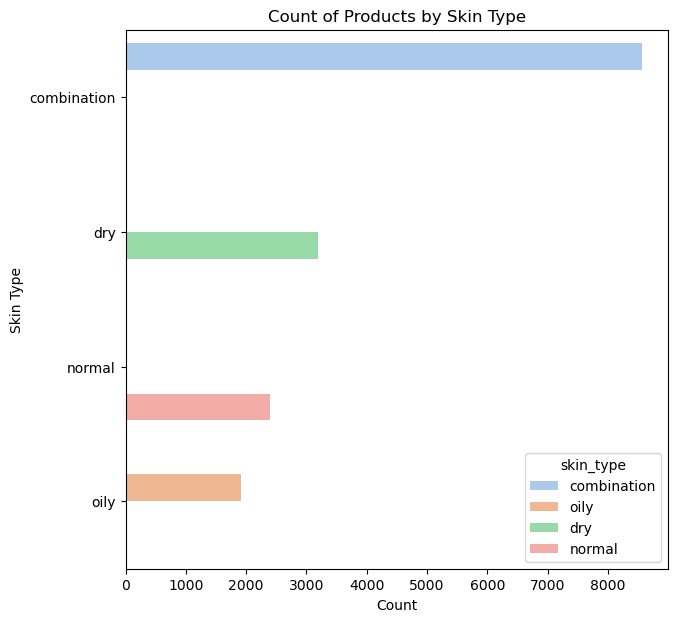

In [14]:
# Count of Products by Skin Type
plt.figure(figsize=(7, 7))
sns.countplot(y='skin_type', data=data, order=data['skin_type'].value_counts().index, palette='pastel', hue='skin_type')
plt.title('Count of Products by Skin Type')
plt.xlabel('Count')
plt.ylabel('Skin Type')
plt.show()

The distribution shows that products labeled for combination skin are the most common, followed by those for dry, normal, and then oily skin. This insight can guide product selection based on prevalent skin types and consumer demand within the Black women demographic.

#### BIVARIATE ANALYSIS

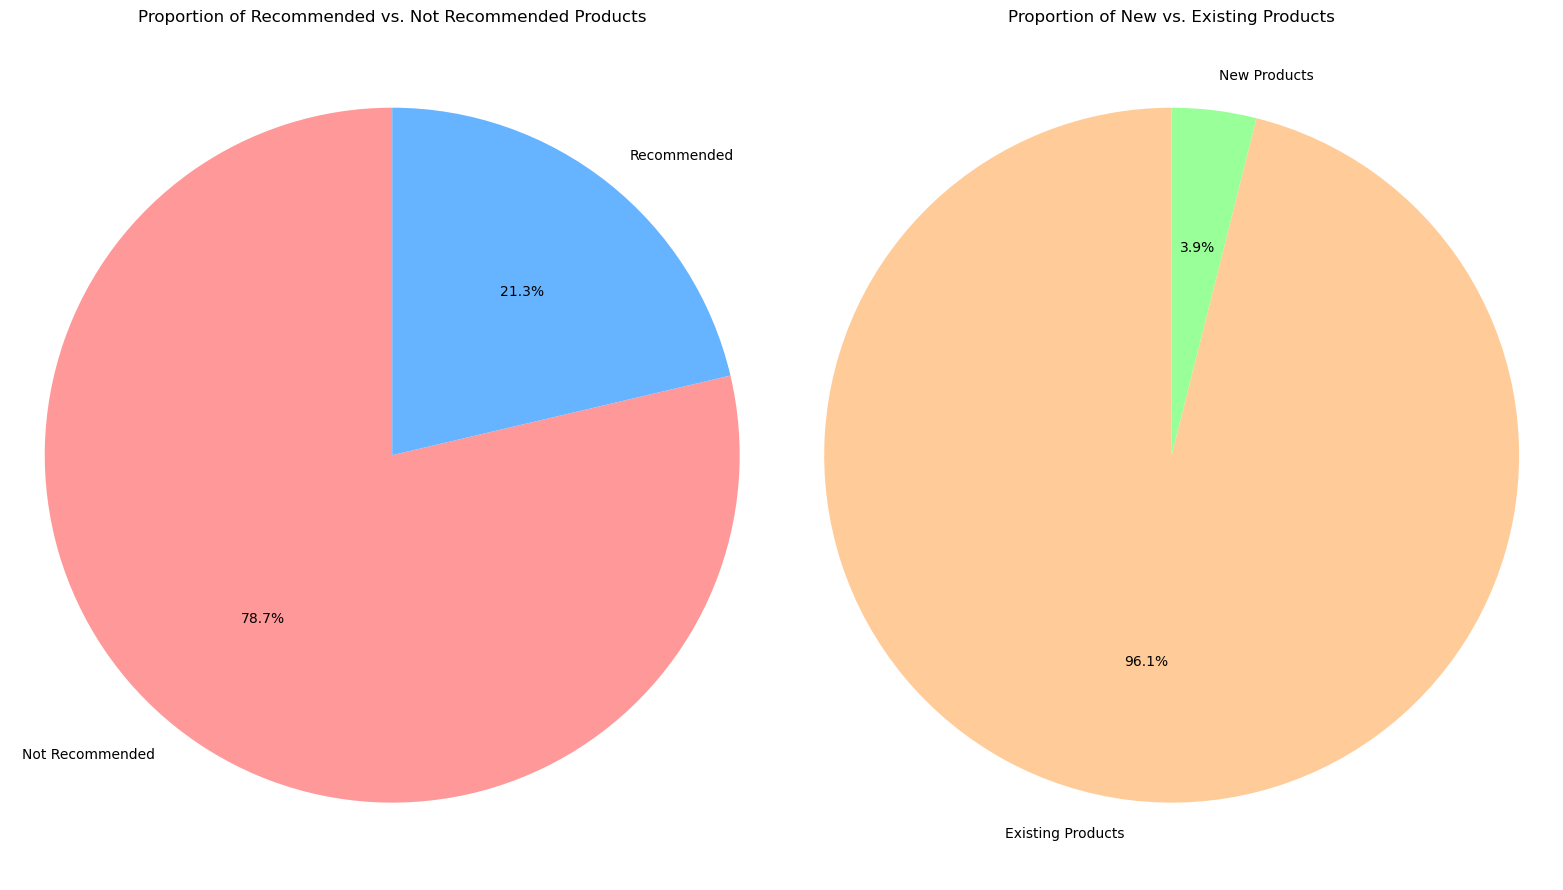

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

# Pie chart for Recommended vs Not Recommended
recommendation_counts = data['is_recommended'].value_counts()
ax1.pie(recommendation_counts, labels=['Not Recommended', 'Recommended'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
ax1.set_title('Proportion of Recommended vs. Not Recommended Products')
ax1.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Pie chart for New vs Existing Products
new_counts = data['new'].value_counts()
ax2.pie(new_counts, labels=['Existing Products', 'New Products'], autopct='%1.1f%%', startangle=90, colors=['#FFCC99', '#99FF99'])
ax2.set_title('Proportion of New vs. Existing Products')
ax2.axis('equal')

plt.tight_layout()
plt.show()

The **Recommended** pie chart illustrates the percentage of products recommended versus those that are not. A significant portion (80.3%) of products are not marked as recommended, indicating a possible quality or suitability gap. This could help identify where product performance might fall short or suggest a need for more tailored product options.

The **Products** pie chart shows the balance between new and existing products. The larger percentage of existing products (96.3%) suggests that the platform maintains a consistent range of products, with newer items being introduced selectively. This distribution can provide insights into the inventory management and refresh rates of the catalog over time.

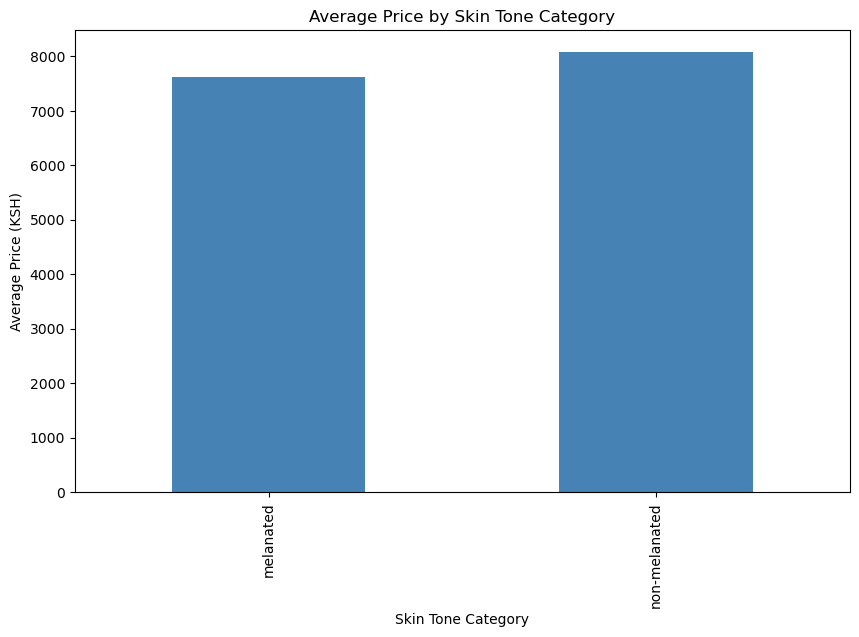

In [16]:
# Average Price by Skin Tone
avg_price_skin_tone = data.groupby('skin_tone_category')['price_ksh'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_price_skin_tone.plot(kind='bar', color='steelblue')
plt.title('Average Price by Skin Tone Category')
plt.xlabel('Skin Tone Category')
plt.ylabel('Average Price (KSH)')
plt.show()

There is a noticeable price difference across skin tones. Products for melanated skin tend to have lower average prices, than non-melanated skin tones, highlighting more affordable options specifically formulated or suited for melanated skin. 

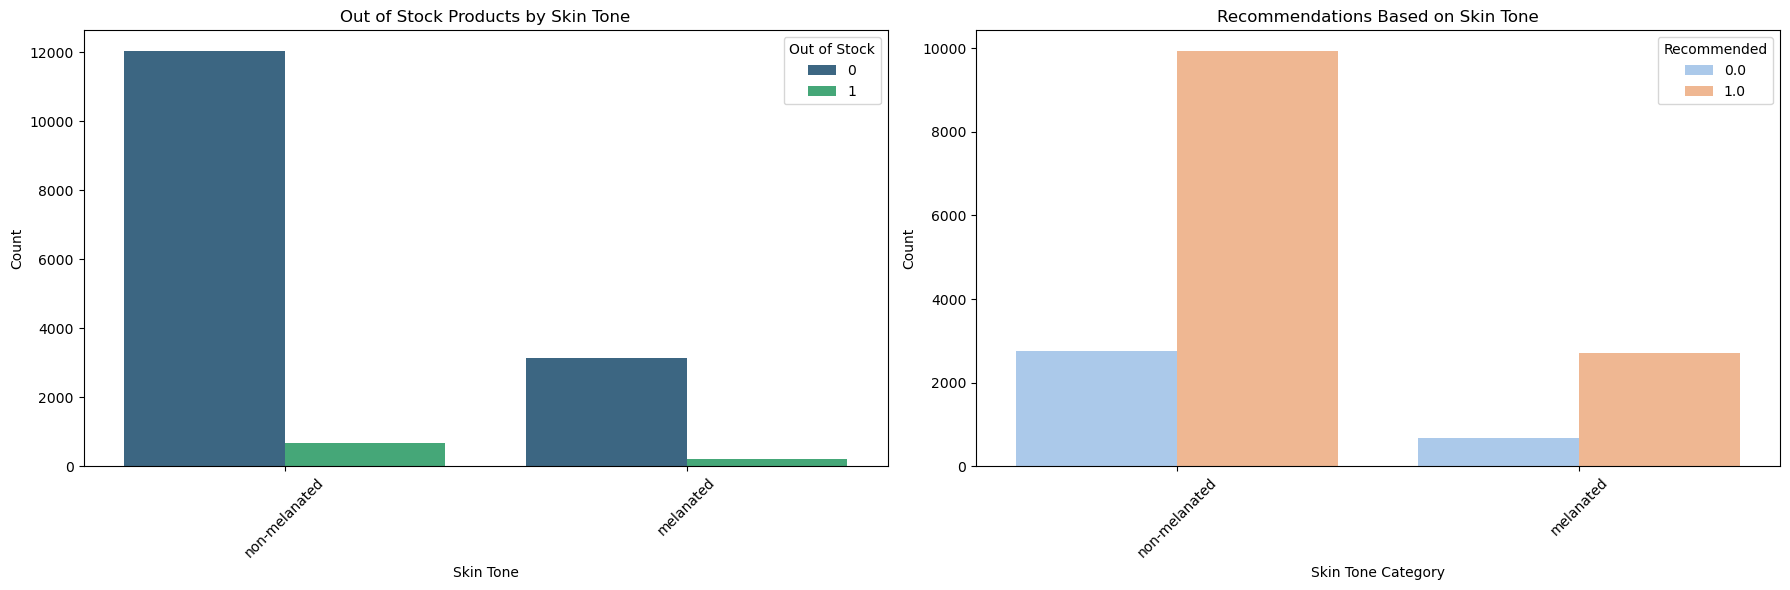

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Out of Stock by Skin Tone
sns.countplot(x='skin_tone_category', hue='out_of_stock', data=data, palette='viridis', ax=ax1)
ax1.set_title('Out of Stock Products by Skin Tone')
ax1.set_xlabel('Skin Tone')
ax1.set_ylabel('Count')
ax1.legend(title='Out of Stock')
ax1.tick_params(axis='x', rotation=45)

# Recommendations by Skin Tone
sns.countplot(x='skin_tone_category', hue='is_recommended', data=data, palette='pastel', ax=ax2)
ax2.set_title('Recommendations Based on Skin Tone')
ax2.set_xlabel('Skin Tone Category')
ax2.set_ylabel('Count')
ax2.legend(title='Recommended')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Lighter skin tones show a higher count of both in-stock and out-of-stock products. This contrasts with deep skin tones which have fewer options overall and lower in-stock counts. This discrepancy might indicate a supply gap for these deeper skin tones, which are more likely to face limited product availability.

Products targeting melanated skin tones receive fewer recommendations, suggesting that product options may not fully address the needs or preferences of these individuals.

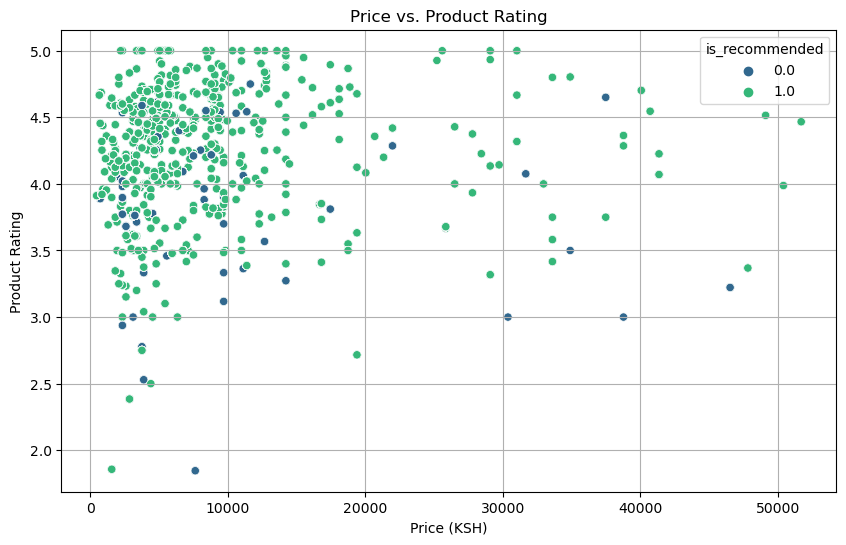

In [18]:
# Correlation between Ratings and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='price_ksh', y='rating_x', hue='is_recommended', palette='viridis')
plt.title('Price vs. Product Rating')
plt.xlabel('Price (KSH)')
plt.ylabel('Product Rating')
plt.grid()
plt.show()

The scatter plot shows the relationship between product price and customer ratings. Although there is no strong correlation, products in the low-to-mid price range tend to receive favorable ratings, suggesting that affordability does not necessarily compromise quality. This insight may encourage users to explore budget-friendly options without sacrificing product satisfaction.

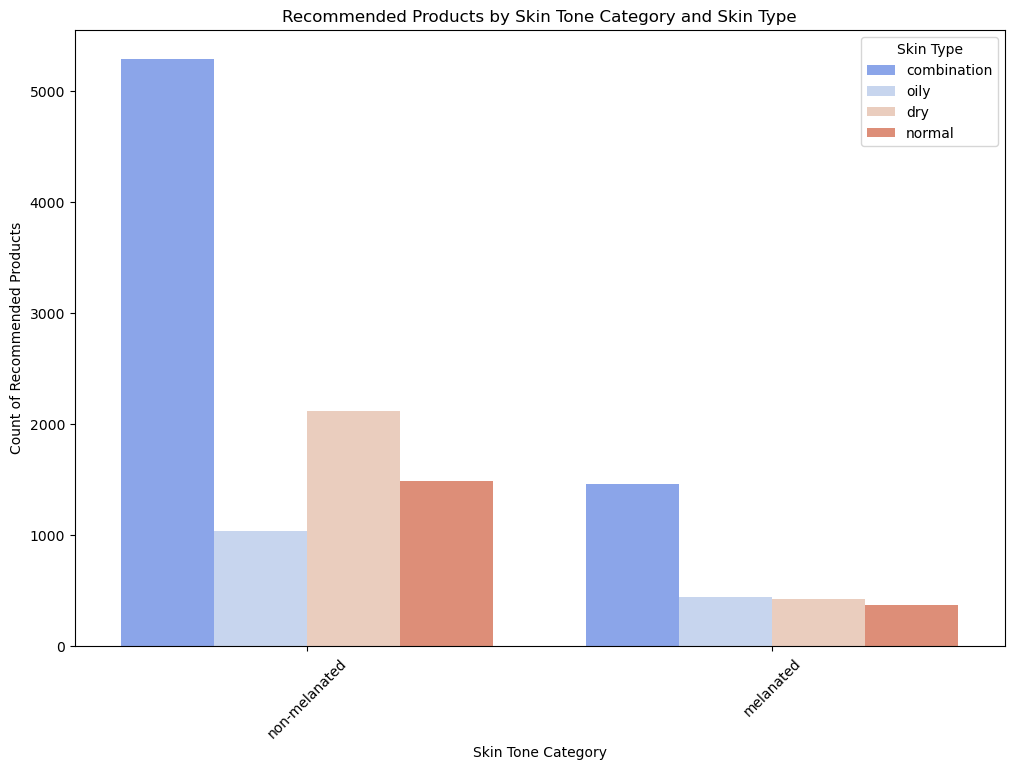

In [19]:
# Count of Recommended Products by Skin Tone and Skin Type
plt.figure(figsize=(12, 8))
sns.countplot(x='skin_tone_category', hue='skin_type', data=data[data['is_recommended'] == 1], palette='coolwarm')
plt.title('Recommended Products by Skin Tone Category and Skin Type')
plt.xlabel('Skin Tone Category')
plt.ylabel('Count of Recommended Products')
plt.xticks(rotation=45)
plt.legend(title='Skin Type')
plt.show()

There are more recommended product options for combination and dry skin types across lighter skin tones. This trend highlights a potential focus on lighter tones in product recommendations, which may overlook the unique needs of Black women with deeper skin tones and varied skin types.

#### MULTIVARIATE ANALYSIS

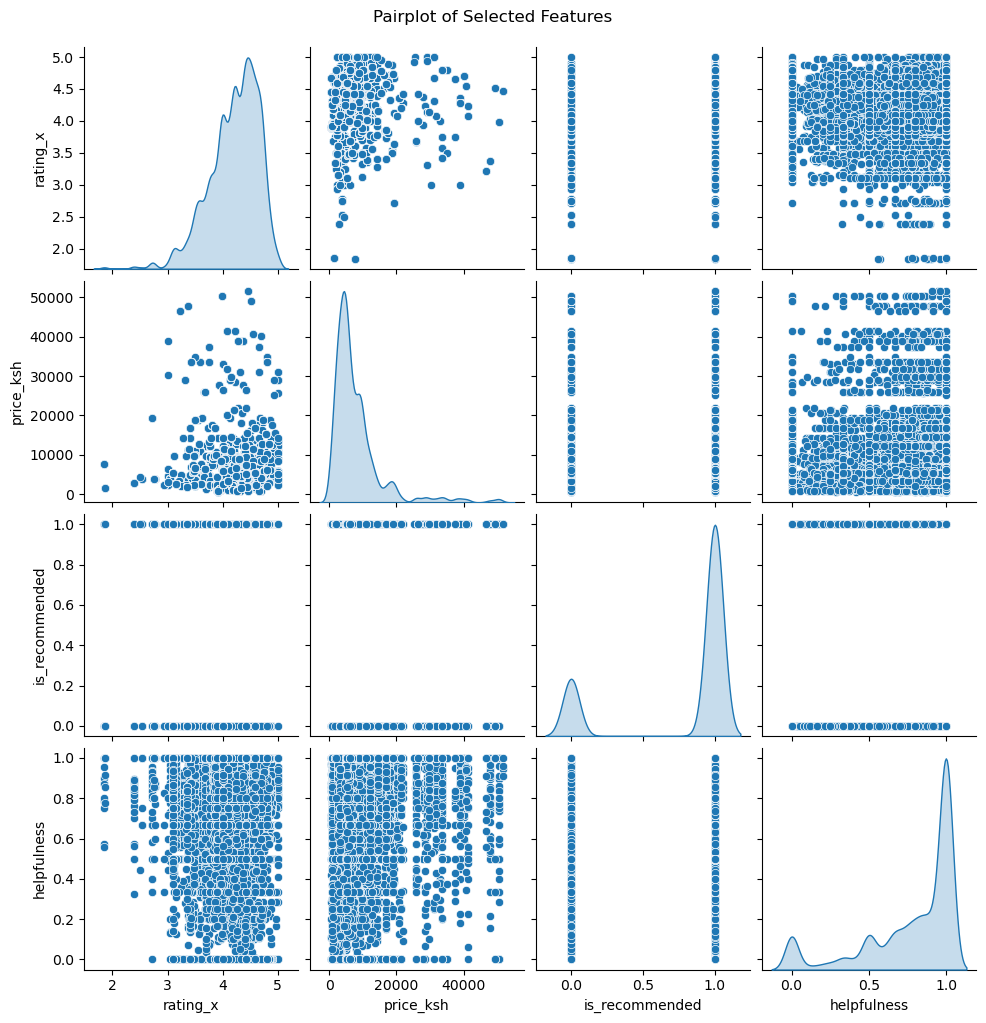

In [20]:
# Pairplot for Selected Features
selected_features = ['rating_x', 'price_ksh', 'is_recommended', 'helpfulness']
sns.pairplot(data[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

The pair plot examines relationships between selected numeric features, such as rating, price(Ksh), and helpfulness. The absence of clear patterns in most pairwise relationships suggests limited linear correlation among these variables. However, this view offers insight into the variability and potential interactions within the data, aiding in feature selection and engineering for subsequent modeling.

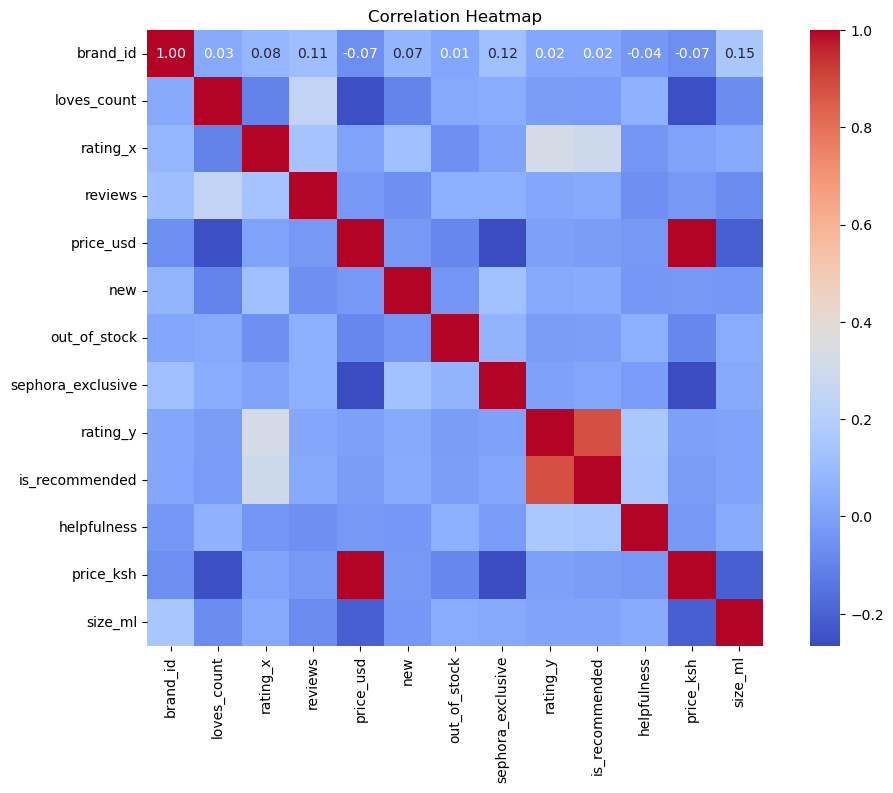

In [21]:
# Heatmap of Correlation Between Numeric Features
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation only on numeric columns
correlation = numeric_data.corr()

# Create the heatmap
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows weak to moderate correlations between numeric features, with notable clusters indicating relationships. 

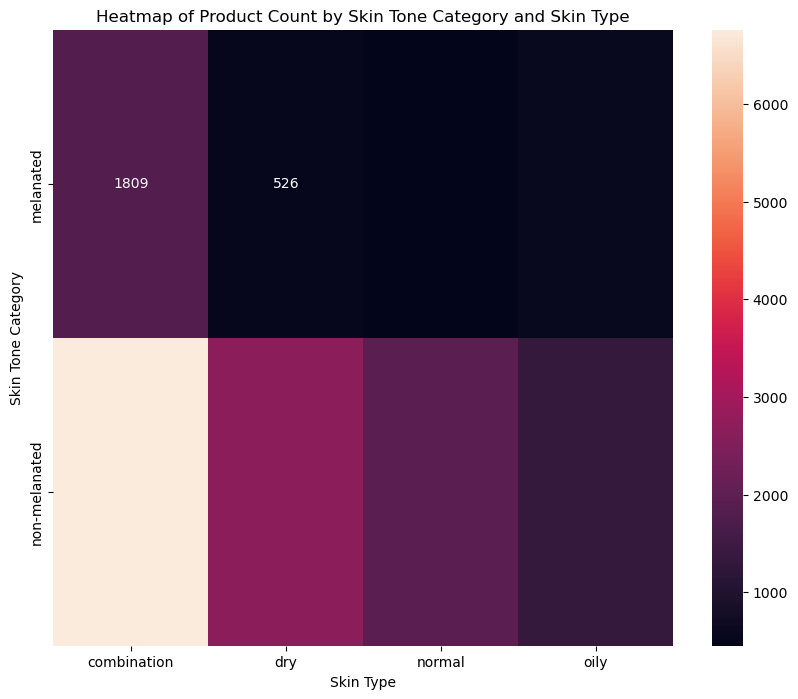

In [22]:
# Create a contingency table
contingency_table = pd.crosstab(index=data['skin_tone_category'], columns=data['skin_type'])
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Heatmap of Product Count by Skin Tone Category and Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Skin Tone Category')
plt.show()

The heatmap analysis of `skin_type` and `skin_tone_category` highlights important insights that align closely with our objective of providing tailored skincare recommendations for Black women. Our data reveals a concentration of products available for combination and dry skin types, particularly within lighter skin tones. However, there is a notable scarcity of options for deeper skin tones, suggesting that Black women may have fewer product options specifically suited to their needs. This gap underscores the limited market focus on skincare for melanin-rich skin concerns, such as hyperpigmentation, dryness, and sensitivity, which are often more pronounced in deeper skin tones.

These findings directly support our business problem: many existing recommendation systems fail to provide targeted solutions for Black women. The evident lack of specialized options for drier skin in deeper tones emphasizes an opportunity to develop and recommend products that address this unique need. By prioritizing these underserved areas, our recommendation system can significantly enhance satisfaction and efficacy for Black women seeking products that work for their melanin-rich skin.

### STEP 4: NLP and Sentiment Analysis

1. Data Preprocessing for NLP

Objective: Prepare text data for sentiment analysis.
Steps:
Tokenization, Stopwords Removal, Stemming, and Lemmatization to clean text.


In [23]:


nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

data['cleaned_review_text'] = data['review_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nkatha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nkatha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



2. Vectorization (Convert Text to Numerical Form)

Machine learning models require numerical input, so we need to convert the text data to numeric form. Here are two common techniques:

a).Bag of Words (Count Vectorizer):

Represents text as a set of features, where each feature is a unique word in the entire corpus.

In [24]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['review_text'])


b).TF-IDF (Term Frequency-Inverse Document Frequency):

Similar to Bag of Words but gives more importance to rare words.
X represents the transformed text data, and it will be used as the input features for modeling.

In [25]:

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your data
X = tfidf_vectorizer.fit_transform(data['review_text'])


3. Labeling the Sentiment

To train a supervised model, we need labeled data for sentiment. Since reviews might not come with sentiment labels, we will label them manually (as positive, neutral, or negative) or use a pre-trained sentiment analyzer like VADER for initial labels.

Example Using VADER for Labeling:

Apply VADER to assign sentiment scores, then label based on scores.

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

data['sentiment_score'] = data['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment_label'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')


In [27]:
#Convert Sentiment Labels to Numeric Format:

data['sentiment_numeric'] = data['sentiment_label'].map({'positive': 1, 'neutral': 0, 'negative': -1})
y = data['sentiment_numeric']


4. Initial Sentiment Scoring with VADER
Objective: Use VADER for a quick sentiment score to establish a baseline.

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
data['vader_sentiment_score'] = data['cleaned_review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


#### NLP Model Training and Evaluation

we will use Logistic Regression or Random Forest for sentiment classification.

1.Logistic Regression:

Logistic Regression is often effective for binary or multiclass classification tasks.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.912826899128269
Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.29      0.44       186
           0       0.84      0.26      0.39       191
           1       0.91      1.00      0.95      2835

    accuracy                           0.91      3212
   macro avg       0.88      0.51      0.60      3212
weighted avg       0.91      0.91      0.89      3212



Results;

From the Logistic Regression results,  we can see that the model has a high overall accuracy (91%).
but the classification report indicates an imbalance in performance across sentiment classes (positive, neutral, negative).

The macro average reveals low recall (0.51) and F1-score (0.60), indicating poor performance across all classes, especially the minority ones.

The weighted average is skewed toward the positive class, reflecting the class imbalance’s effect on overall performance.


2.Random Forest:

Random Forest is an ensemble model that can capture complex patterns in the data and often performs well on text-based tasks.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9028642590286425
Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.19      0.31       186
           0       0.79      0.22      0.34       191
           1       0.91      1.00      0.95      2835

    accuracy                           0.90      3212
   macro avg       0.86      0.47      0.53      3212
weighted avg       0.90      0.90      0.88      3212



Results;
Our Random Forest model has achieved high overall accuracy (90%), but, similar to Logistic Regression, it still underperforms for the negative (-1) and neutral (0) classes.

We will attempt to Increase the class weight for the negative class even further to make it more prominent in training since adjusting class_weight in Random Forest or Gradient Boosting can provide more attention to the negative class.

In [31]:
rf_manual_weights = RandomForestClassifier(class_weight={-1: 5, 0: 5, 1: 1}, random_state=42)
rf_manual_weights.fit(X_train, y_train)
y_pred_manual_weights = rf_manual_weights.predict(X_test)
print(classification_report(y_test, y_pred_manual_weights))


              precision    recall  f1-score   support

          -1       0.92      0.12      0.22       186
           0       0.80      0.34      0.48       191
           1       0.91      1.00      0.95      2835

    accuracy                           0.91      3212
   macro avg       0.88      0.49      0.55      3212
weighted avg       0.90      0.91      0.88      3212



Results;
Overall, 91% of predictions are correct, largely due to the strong performance on the positive class.

The model is highly effective at identifying positive sentiment but struggles with negative and neutral sentiments due to low recall in those classes.

The macro average metrics indicate an imbalance in model performance across classes, while the weighted average metrics are skewed positively due to the majority positive class.

3. XGBoost with Targeted Weights
XGBoost with custom class weights to address imbalance more directly.

XGBoost’s ability to fine-tune learning rates and handle imbalances may improve recall in the negative class.

In [34]:
from xgboost import XGBClassifier

# Remapping class labels to 0, 1, 2
y_train_mapped = y_train.map({-1: 0, 0: 1, 1: 2})
y_test_mapped = y_test.map({-1: 0, 0: 1, 1: 2})

# Train XGBoost with mapped labels
xgb_model = XGBClassifier(scale_pos_weight=10, random_state=42)
xgb_model.fit(X_train, y_train_mapped)
y_pred_xgb = xgb_model.predict(X_test)

# Remap predictions back to original labels for evaluation
y_pred_original = pd.Series(y_pred_xgb).map({0: -1, 1: 0, 2: 1})
print(classification_report(y_test, y_pred_original))


              precision    recall  f1-score   support

          -1       0.79      0.37      0.50       186
           0       0.78      0.71      0.74       191
           1       0.95      0.99      0.97      2835

    accuracy                           0.94      3212
   macro avg       0.84      0.69      0.74      3212
weighted avg       0.93      0.94      0.93      3212



Results;

Accuracy of 94%.
This is an improvement and shows that the model is performing well across all classes.
Our model also shows a notable improvement, especially in the recall and F1-scores for the negative (-1) and neutral (0) classes.

Our model has achieved a strong balance as is.

4. Hyperparameter Tuning 

We can improve model performance by tuning hyperparameters using GridSearchCV or RandomizedSearchCV.

a)Hyperparameter Tuning with Random Forest
Let's start with a GridSearchCV example for Random Forest.

b)Hyperparameter Tuning with XGBoost

For XGBoost, we will use RandomizedSearchCV. This approach is often faster, as it samples a subset of hyperparameter combinations, and it works well with large parameter grids.

In [35]:
# Define X with selected features, e.g., review text, rating, loves count, and price
X = data[['review_text', 'rating_x', 'loves_count', 'price_usd']] 
y = data['is_recommended'] 


In [36]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define the numeric and text preprocessing steps
numeric_features = ['rating_x', 'loves_count', 'price_usd']
numeric_transformer = StandardScaler()
text_transformer = TfidfVectorizer(max_features=100)

# Combine preprocessing steps for both text and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('text', text_transformer, 'review_text')
    ]
)

# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Set up the hyperparameter grid for XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__scale_pos_weight': [5, 10, 20]  # Adjust for class imbalance
}

# RandomizedSearchCV with the pipeline
random_search_xgb = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_xgb, 
                                       n_iter=50, cv=5, scoring='f1_macro', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV on the training data
random_search_xgb.fit(X_train, y_train)
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)

# Evaluate on the test set
y_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


Best Parameters for XGBoost: {'classifier__scale_pos_weight': 5, 'classifier__n_estimators': 300, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.3}
              precision    recall  f1-score   support

         0.0       0.74      0.32      0.45       665
         1.0       0.85      0.97      0.90      2547

    accuracy                           0.84      3212
   macro avg       0.79      0.65      0.68      3212
weighted avg       0.82      0.84      0.81      3212



Deep Learning Model for Sentiment Classification (LSTM)

Objective: Train an LSTM model to classify sentiment as positive, neutral, or negative.

Steps:
Tokenization and Padding: Prepare sequences for LSTM.
Model Training: Train LSTM on labeled sentiment data.

In [45]:
!pip install tensorflow


  Using cached wrapt-1.16.0-cp311-cp311-win_amd64.whl.metadata (6.8 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 493.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.2 MB 2.6 MB/s eta 0:02:33
   ---------------------------------------- 0.1/390.2 MB 2.4 MB/s eta 0:02:43
   ---------------------------------------- 0.2/390.2 MB 1.7 MB/s eta 0:03:44
   ---------------------------------------- 0.2/390.2 MB 1.7 MB/s eta 0:03:44
   ---------------------------------------- 0.2/390.2 MB 1.7 MB/s eta 0:03:44
   ---------------------------------------- 0.2/390.2 MB 1.7 MB/s eta 0:03:44
   ---------------------------------------- 0.2/390.2 MB 1.7 MB/s eta 0:03:44
   ---------------------------------------- 0.2/390.2 MB 1.7 MB/s eta 0:03:44
 


   ----------------------------- -------- 306.7/390.2 MB 579.9 kB/s eta 0:02:24
   ----------------------------- -------- 306.7/390.2 MB 579.9 kB/s eta 0:02:24
   ----------------------------- -------- 306.8/390.2 MB 577.3 kB/s eta 0:02:25
   ----------------------------- -------- 306.8/390.2 MB 575.8 kB/s eta 0:02:25
   ----------------------------- -------- 306.8/390.2 MB 575.8 kB/s eta 0:02:25
   ----------------------------- -------- 306.8/390.2 MB 575.8 kB/s eta 0:02:25
   ----------------------------- -------- 306.8/390.2 MB 574.3 kB/s eta 0:02:26
   ----------------------------- -------- 306.8/390.2 MB 574.3 kB/s eta 0:02:26
   ----------------------------- -------- 306.8/390.2 MB 571.3 kB/s eta 0:02:26
   ----------------------------- -------- 306.8/390.2 MB 571.3 kB/s eta 0:02:26
   ----------------------------- -------- 306.8/390.2 MB 567.8 kB/s eta 0:02:27
   ----------------------------- -------- 306.8/390.2 MB 567.8 kB/s eta 0:02:27
   ----------------------------- ------

a) Prepare Data for LSTM

LSTMs require input in a numerical format and are sensitive to sequence length. Here’s how to prepare the data:

Tokenize Text Data:

Convert review_text into sequences of numbers using Tokenizer from Keras.

Pad Sequences:

Pad all sequences to the same length to make them compatible with the LSTM model.

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Parameters
max_words = 10000  # Maximum number of words to keep
max_sequence_length = 200  # Maximum sequence length to pad

# Tokenize and convert text to sequences
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['review_text'])
sequences = tokenizer.texts_to_sequences(data['review_text'])

# Pad sequences to ensure all have the same length
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Define target (assuming 'is_recommended' as the target variable)
y = data['is_recommended'].values  # Replace with the correct target column if needed


b) Train-Test Split & Build the LSTM Model

Split the data into training and testing sets.

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Model Parameters
embedding_dim = 64  # Dimension of embedding space

# Define the LSTM model
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_sequence_length),
    LSTM(64, return_sequences=True),  # First LSTM layer with return_sequences=True for stacking
    Dropout(0.5),                     # Regularization to prevent overfitting
    LSTM(32),                         # Second LSTM layer
    Dropout(0.5),
    Dense(16, activation='relu'),     # Dense layer
    Dense(1, activation='sigmoid')    # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


c) Training the model

Fit the model on the training data. 

Use validation data to monitor the model’s performance.

In [50]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=10,                # Adjust based on convergence
    batch_size=32,            # Adjust based on dataset size and memory capacity
    validation_split=0.2,     # Set aside some of the training data for validation
    verbose=1
)


Epoch 1/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 66s 187ms/step - accuracy: 0.7780 - loss: 0.5237 - val_accuracy: 0.8767 - val_loss: 0.2883
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 64s 198ms/step - accuracy: 0.8981 - loss: 0.2534 - val_accuracy: 0.8879 - val_loss: 0.2782
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 57s 178ms/step - accuracy: 0.9332 - loss: 0.1800 - val_accuracy: 0.8833 - val_loss: 0.2881
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 55s 170ms/step - accuracy: 0.9538 - loss: 0.1305 - val_accuracy: 0.8782 - val_loss: 0.3485
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 53s 163ms/step - accuracy: 0.9649 - loss: 0.1030 - val_accuracy: 0.8689 - val_loss: 0.3597
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 54s 168ms/step - accuracy: 0.9733 - loss: 0.0764 - val_accuracy: 0.8669 - val_loss: 0.4720
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 77s 152ms/step - accuracy: 0.9828 - loss: 0.0541 - val_accuracy: 0.8735 - val_loss: 0.5301
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 51s 158ms/step - accuracy: 0.9837 - loss: 0

d) Evaluate the Model

After training, evaluate the model on the test set to get accuracy and loss metrics.

In [51]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8671 - loss: 0.6988
Test Accuracy: 0.8646


e)  Analyze Model Performance

Plotting the accuracy and loss over epochs can give insights into the model’s learning curve.

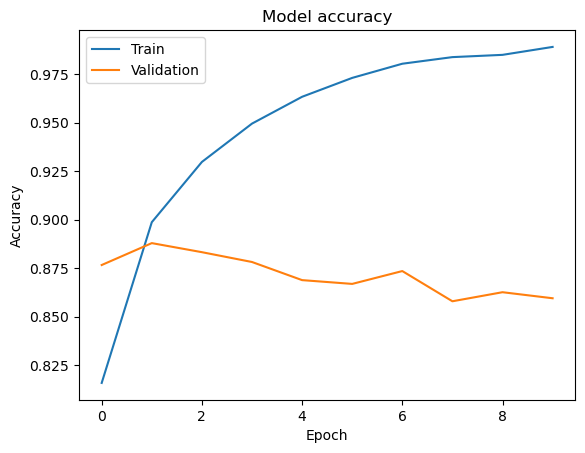

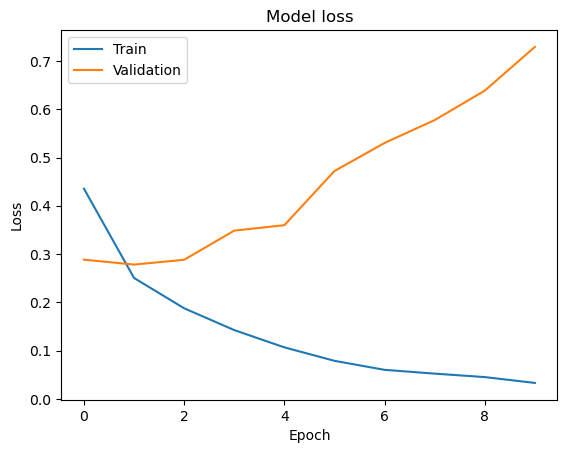

In [52]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


f) Make Predictions

Use the trained model to predict sentiments on new or test data.

In [53]:
# Predict probabilities on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Display classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step
              precision    recall  f1-score   support

         0.0       0.68      0.65      0.67       665
         1.0       0.91      0.92      0.92      2547

    accuracy                           0.86      3212
   macro avg       0.80      0.79      0.79      3212
weighted avg       0.86      0.86      0.86      3212



Using the Model in Recommendation System

Here we will use our trained sentiment model to classify new reviews, filtering for positive sentiments to highlight well-rated products in your recommendation system.

In [42]:
# Predict sentiment for new reviews
new_reviews = ["This product works great!", "I didn't like it at all."]
new_reviews_vectorized = tfidf_vectorizer.transform(new_reviews)
predictions = lr.predict(new_reviews_vectorized)

# Interpret results
sentiment_mapping = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
predicted_sentiments = [sentiment_mapping[pred] for pred in predictions]
print(predicted_sentiments)


['Positive', 'Positive']


#### Sentiment Analysis of Reviews using VADER

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nkatha\AppData\Roaming\nltk_data...


True

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER to get sentiment scores
data['sentiment_score'] = data['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


#### Aggregating Sentiment by Product
Here we aggregate the scores for each product to get an overall sentiment indicator (such as average sentiment) that will be used in the recommendation system.
So that product_sentiment contains an avg_sentiment_score for each product_id, representing the general customer sentiment toward each product.

In [43]:
# Calculate average sentiment score per product
product_sentiment = data.groupby('product_id')['sentiment_score'].mean().reset_index()
product_sentiment.columns = ['product_id', 'avg_sentiment_score']


#### Merge Sentiment Data with Product Data
We Integrate the aggregated sentiment scores into our main product dataset, so that each product has an associated average sentiment score.

In [44]:
# Merge the sentiment data back into the main product data
product_data = pd.merge(products_filtered, product_sentiment, on='product_id', how='left')


#### Enhancing the Recommendation Algorithm

We can incorporate sentiment in various ways:

1. Content-Based Filtering Enhancement
Combining Sentiment with Product Features:

Adding the avg_sentiment_score as a feature alongside other product attributes (e.g., ingredients, highlights) when calculating product similarity.
When recommending similar products, emphasize those with higher sentiment scores.

In [46]:
#Check for Missing Values
print(product_data[['ingredients', 'highlights', 'avg_sentiment_score']].isnull().sum())

ingredients             945
highlights             2207
avg_sentiment_score    7959
dtype: int64


In [47]:
#Filling Missing Values
# we replace NaN values in each of these columns with an empty string ("") 
# or a placeholder to allow the concatenation to proceed smoothly.
# Fill missing values in the columns
product_data['ingredients'] = product_data['ingredients'].fillna('')
product_data['highlights'] = product_data['highlights'].fillna('')
product_data['avg_sentiment_score'] = product_data['avg_sentiment_score'].fillna(0)  # or fill with an empty string


In [48]:
#Recreating the Combined Features:
product_data['combined_features'] = (
    product_data['ingredients'] + ' ' + 
    product_data['highlights'] + ' ' + 
    product_data['avg_sentiment_score'].astype(str)
)


In [49]:
#Re-run the TF-IDF Vectorization
# With combined_features cleaned, retry the TF-IDF vectorization.

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(product_data['combined_features'])


In [50]:
# Example using TF-IDF for content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Use product descriptions and avg_sentiment_score to enhance content similarity
product_data['combined_features'] = product_data['ingredients'] + ' ' + product_data['highlights'] + ' ' + product_data['avg_sentiment_score'].astype(str)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(product_data['combined_features'])

# Calculate cosine similarity for recommendations
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


#### Collaborative Filtering:

We Use sentiment-weighted ratings to prioritize products with positive feedback in collaborative filtering.
For example, multiply user ratings by (1 + avg_sentiment_score) to adjust ratings based on product sentiment.

In [56]:
# Inspect rating_x and rating_y Columns:
print(data[['rating_x', 'rating_y']].head())


    rating_x  rating_y
3      4.464         5
5      4.464         5
8      4.464         4
9      4.464         5
10     4.464         5


In [57]:
# Ensuring sentiment_score has no missing values to avoid calculation errors
#Multiply rating_y by (1 + sentiment_score) 
# to create a new column called adjusted_rating.
data['sentiment_score'] = data['sentiment_score'].fillna(0)

# Calculate adjusted rating using rating_y
data['adjusted_rating'] = data['rating_y'] * (1 + data['sentiment_score'])


In [58]:
#Check a few rows to confirm the adjusted ratings 
# make sense based on the sentiment scores.

print(data[['product_id', 'rating_y', 'sentiment_score', 'adjusted_rating']].head())


   product_id  rating_y  sentiment_score  adjusted_rating
3     P453818         5           0.9199           9.5995
5     P453818         5           0.6705           8.3525
8     P453818         4           0.3252           5.3008
9     P453818         5           0.2960           6.4800
10    P453818         5           0.4404           7.2020


To implement a collaborative filtering system with the adjusted ratings we’ve calculated, we’ll use a matrix factorization technique (like Singular Value Decomposition (SVD)) on the user-item matrix that contains these adjusted ratings.

 1.Preparing the User-Item Matrix
Here we create a pivot table where rows are users, columns are products, and values are the adjusted_rating. This matrix will serve as the input for collaborative filtering.

In [59]:
# Create the user-item matrix with adjusted ratings
user_item_matrix = data.pivot_table(index='author_id', columns='product_id', values='adjusted_rating').fillna(0)

# Display a few rows to confirm the matrix setup
print(user_item_matrix.head())


product_id   P202935  P270600  P375854  P375864  P376135  P377919  P379009  \
author_id                                                                    
10000117144      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10000846022      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10004128984      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1000447910       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10005364438      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

product_id   P379704  P379705  P379709  ...  P505133  P505142  P505145  \
author_id                               ...                              
10000117144      0.0      0.0      0.0  ...      0.0      0.0      0.0   
10000846022      0.0      0.0      0.0  ...      0.0      0.0      0.0   
10004128984      0.0      0.0      0.0  ...      0.0      0.0      0.0   
1000447910       0.0      0.0      0.0  ...      0.0      0.0      0.0   
100053644

2.Applying Matrix Factorization Using SVD
By Performing SVD on the user-item matrix to reduce its dimensionality and capture latent features that represent user and product preferences.

In [60]:
from sklearn.decomposition import TruncatedSVD

# Define the SVD model with a specified number of components (latent factors)
n_components = 20  # Adjust based on dataset size
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit SVD on the user-item matrix
user_features = svd.fit_transform(user_item_matrix)


3. Calculating Similarity Scores
Calculate the similarity between products based on their representations in the latent space. This allows us to make product recommendations based on user preferences.

In [63]:
# Assuming 'user_features' was derived from SVD and has shape 
# (num_users, n_components)
# We can transpose 'user_features' to treat products 
# as rows in the latent space

# Extract product embeddings from the user-item matrix after SVD 
# (transpose for product similarities)
product_embeddings = svd.components_.T  # Shape will be (535, 20) if 535 products and 20 latent features

# Calculate cosine similarity matrix based on reduced product embeddings
from sklearn.metrics.pairwise import cosine_similarity
product_similarity = cosine_similarity(product_embeddings)  # Shape will be (535, 535)

# Convert to DataFrame with original product IDs as index and column names
product_similarity_df = pd.DataFrame(product_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Check the similarity DataFrame to ensure it worked as expected
print(product_similarity_df.head())


product_id   P202935   P270600   P375854   P375864   P376135   P377919  \
product_id                                                               
P202935     1.000000 -0.434793 -0.564823  0.095205  0.146751 -0.090464   
P270600    -0.434793  1.000000  0.379946 -0.205041 -0.174890  0.195893   
P375854    -0.564823  0.379946  1.000000 -0.237583  0.143193  0.290298   
P375864     0.095205 -0.205041 -0.237583  1.000000  0.175860 -0.104975   
P376135     0.146751 -0.174890  0.143193  0.175860  1.000000  0.015515   

product_id   P379009   P379704   P379705   P379709  ...   P505133   P505142  \
product_id                                          ...                       
P202935     0.414933  0.038132 -0.196842 -0.274500  ...  0.253923 -0.563427   
P270600    -0.372109 -0.111821  0.142702  0.321937  ... -0.045639  0.136026   
P375854    -0.445220 -0.398083  0.207203 -0.047594  ... -0.274752  0.191711   
P375864     0.791856 -0.148706  0.041611 -0.287731  ...  0.046754  0.026075   
P376135

5. Generate Recommendations

Goal: To Combine recommendations from content-based and collaborative filtering, prioritizing products with high positive sentiment for melanin-rich users.
Steps:

Content-Based Recommendations: Recommend products with high cosine similarity based on the combined_features.

Collaborative Filtering Recommendations: Use the SVD-derived similarity to recommend products based on similar user behavior.

Filter by Sentiment Score: Prioritize products with high avg_adjusted_rating in both recommendation types.

In [64]:
# Content-based: Recommend top similar products based on features and sentiment
def content_based_recommendations(product_id, top_n=5):
    idx = product_data[product_data['product_id'] == product_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude the product itself
    product_indices = [i[0] for i in sim_scores]
    return product_data['product_name'].iloc[product_indices]

# Collaborative filtering: Recommend top products based on adjusted user-item matrix
def collaborative_recommendations(user_id, top_n=5):
    user_idx = user_item_matrix.index.get_loc(user_id)
    user_similarity = cosine_similarity([user_features[user_idx]], user_features).flatten()
    top_user_idx = user_similarity.argsort()[-top_n-1:-1][::-1]
    recommended_products = user_item_matrix.columns[top_user_idx]
    return recommended_products


6. Combine and Filter by High Sentiment

Here we will Combine results from both recommendation systems, prioritizing high-sentiment products for users with melanin-rich skin tones.

In [65]:
def final_recommendations(user_id, product_id, top_n=5, min_sentiment=7.0):
    # Content-based recommendations
    cb_recommendations = content_based_recommendations(product_id, top_n=10)
    
    # Collaborative recommendations
    cf_recommendations = collaborative_recommendations(user_id, top_n=10)
    
    # Merge recommendations and filter by sentiment
    combined_recommendations = pd.concat([cb_recommendations, cf_recommendations]).drop_duplicates()
    high_sentiment_recommendations = product_data[
        (product_data['product_name'].isin(combined_recommendations)) &
        (product_data['avg_adjusted_rating'] >= min_sentiment)
    ]
    
    # Return top high-sentiment recommendations
    return high_sentiment_recommendations.head(top_n)


### STEP 5: MODELING

Our recommendation system can enhance satisfaction and efficacy for Black women by using data-driven insights from the heatmap to spotlight and prioritize products that meet specific, underserved needs. For instance, with the observed lack of options for dry skin in deeper skin tones, our system can recommend products designed to address hydration and moisture retention, which are critical for managing dryness in melanin-rich skin. Additionally, by identifying gaps for specific skin tones and types, we can curate products with ingredients that target common issues like hyperpigmentation or sensitivity—problems particularly relevant to Black women.

Through advanced filtering, collaborative filtering, and sentiment analysis, our system can highlight well-rated products that align with these needs, even if they’re currently under-marketed for Black women. By promoting these options and analyzing user feedback, the system can gradually refine and adjust recommendations, helping users find products that not only align with their skin type and tone but also actively address their unique skin concerns. This targeted approach leads to more effective skincare routines, as users are less likely to waste time or money on unsuitable products, ultimately increasing both satisfaction and loyalty to our recommendation platform.

### A. Content-Based Filtering Model
- We’ll start with a content-based filtering model using TF-IDF on ingredients and other product features.The aim is to recommend similar products based on ingredients and product features.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity for Products based on Ingredient features
cosine_sim = cosine_similarity(ingredients_matrix)

# Function to Recommend Products based on Content Similarity
def content_based_recommendations(product_id, top_n=5):
    idx = data.index[data['product_id'] == product_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    product_indices = [i[0] for i in sim_scores]
    return data['product_name'].iloc[product_indices]

# Test Recommendation for a Sample Product
sample_product_id = data['product_id'].iloc[0]
print("Content-Based Recommendations:")
print(content_based_recommendations(sample_product_id))


### B. Collaborative Filtering with SVD
- Now we’ll implement collaborative filtering using SVD to capture latent user-product interactions.The goal is to use Matrix Factorization (SVD) on the user-product interaction data for collaborative recommendations.

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Create User-Product Interaction Matrix
user_product_matrix = data.pivot_table(index='author_id', columns='product_id', values='rating_x').fillna(0)

# Apply SVD
svd = TruncatedSVD(n_components=20)
latent_matrix = svd.fit_transform(user_product_matrix)

# Recommending Top Products for a User
def collaborative_recommendations(user_id, top_n=5):
    user_index = data.index[data['author_id'] == user_id].tolist()[0]
    scores = latent_matrix[user_index].dot(latent_matrix.T)
    top_recommendations = scores.argsort()[-top_n:][::-1]
    return data['product_name'].iloc[top_recommendations]

# Test Recommendation for a Sample User
sample_user_id = data['author_id'].iloc[0]
print("Collaborative Filtering Recommendations:")
print(collaborative_recommendations(sample_user_id))


### C. Sentiment Analysis on Review Text
- We'll use NLTK's Sentiment Intensity Analyzer for sentiment scoring on reviews.The goal being to analyze review_text for sentiment to refine recommendations based on positive feedback.

In [ ]:
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Function to Recommend Products Based on Positive Sentiments
def sentiment_based_recommendations(user_id, top_n=5):
    user_reviews = data[data['author_id'] == user_id]
    positive_reviews = user_reviews[user_reviews['sentiment_score'] > 0.2]
    return positive_reviews['product_name'].head(top_n)

# Test Sentiment-Based Recommendation
print("Sentiment-Based Recommendations:")
print(sentiment_based_recommendations(sample_user_id))


#### Drop Unnecessary Columns
Now that we’ve vectorized ingredients and review_text, and extracted sentiment scores, we can drop these original columns

In [ ]:
# Drop the original text columns
data = data.drop(columns=['ingredients', 'review_text'])


##### Preprocess the Data Completely
- Ensure all columns in X are numeric before applying any model. We’ve already converted most columns using TF-IDF, label encoding, and sentiment analysis.

In [ ]:
# Check for remaining non-numeric columns
non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# If there are any remaining non-numeric columns, consider encoding or removing them.


In [ ]:
# Drop unneeded columns
data = data.drop(columns=['product_id', 'author_id'])

# Apply TF-IDF on `product_name` and `highlights'
tfidf_product_name = TfidfVectorizer(max_features=50)
product_name_matrix = tfidf_product_name.fit_transform(data['product_name']).toarray()
product_name_df = pd.DataFrame(product_name_matrix, index=data.index)

tfidf_highlights = TfidfVectorizer(max_features=50)
highlights_matrix = tfidf_highlights.fit_transform(data['highlights']).toarray()
highlights_df = pd.DataFrame(highlights_matrix, index=data.index)

# Concatenate TF-IDF results and drop the original columns
data = pd.concat([data, product_name_df, highlights_df], axis=1)
data = data.drop(columns=['product_name', 'highlights'])

# Encode `size` and `variation_value` if needed
le_size = LabelEncoder()
data['size'] = le_size.fit_transform(data['size'])

le_variation_value = LabelEncoder()
data['variation_value'] = le_variation_value.fit_transform(data['variation_value'])


## Define and Training the base Model(Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define features (X) and target (y) -'is_recommended' is the target variable
X = data.drop(columns=['is_recommended'])
y = data['is_recommended']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert all column names to strings for both train and test sets
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Dropping datetime columns from training data
X_train = X_train.select_dtypes(exclude=['datetime64'])
X_test = X_test.select_dtypes(exclude=['datetime64'])

# Model Training
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)


#### Model Evaluation
Evaluate the model’s performance on the test set.

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

##### DEEP LEARNING .....to be continued

### STEP 6: FEATURE IMPORTANCE

### STEP 7: SAVING MODELS FOR DEPLOYMENT

### RECOMMENDATIONS